In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 200)
import pandas_profiling as pp
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import math, string, os

In [2]:
train_df = pd.read_csv('train.csv', low_memory = False)

In [3]:
train_df.head(22)

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,496723,Eric Berry,29,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,212,12/29/1988,Tennessee,SS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,2495116,Allen Bailey,97,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,288,03/25/1989,Miami,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,2495493,Justin Houston,50,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,270,01/21/1989,Georgia,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,2506353,Derrick Johnson,56,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,245,11/22/1982,Texas,ILB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,2530794,Ron Parker,38,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,206,08/17/1987,Newberry,FS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
5,2017090700,20170907000118,away,75.06,24.00,1.01,0.32,0.18,308.34,95.01,2543494,Dee Ford,55,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-2,252,03/19/1991,Auburn,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
6,2017090700,20170907000118,away,74.11,16.64,1.11,0.83,0.02,357.23,322.59,2543637,Terrance Mitchell,39,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,5-11,190,05/17/1992,Oregon,CB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
7,2017090700,20170907000118,away,73.37,18.73,1.24,0.74,0.13,328.52,270.04,2543851,Phillip Gaines,23,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,193,04/04/1991,Rice,CB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
8,2017090700,20170907000118,away,56.63,26.90,0.26,1.86,0.28,344.70,55.31,2550257,Daniel Sorensen,49,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-2,208,03/05/1990,Brigham Young,SS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
9,2017090700,20170907000118,away,73.35,38.83,4.55,0.76,0.51,75.47,190.84,2552488,Marcus Peters,22,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB

In [4]:
train_df['Yards'].describe()

count    509762.000000
mean          4.212334
std           6.436167
min         -14.000000
25%           1.000000
50%           3.000000
75%           6.000000
max          99.000000
Name: Yards, dtype: float64

In [5]:
train_df.isnull().sum()

GameId                        0
PlayId                        0
Team                          0
X                             0
Y                             0
S                             0
A                             0
Dis                           0
Orientation                  18
Dir                          14
NflId                         0
DisplayName                   0
JerseyNumber                  0
Season                        0
YardLine                      0
Quarter                       0
GameClock                     0
PossessionTeam                0
Down                          0
Distance                      0
FieldPosition              6424
HomeScoreBeforePlay           0
VisitorScoreBeforePlay        0
NflIdRusher                   0
OffenseFormation            110
OffensePersonnel              0
DefendersInTheBox            66
DefensePersonnel              0
PlayDirection                 0
TimeHandoff                   0
TimeSnap                      0
Yards   

In [6]:
def Offense(row):
    if row["Team"] == "home":
        if row["HomeTeamAbbr"] == row["PossessionTeam"]:
            return 1
        else:
            return 0
    elif row["Team"] == "away":
        if row["VisitorTeamAbbr"] == row["PossessionTeam"]:
            return 1
        else:
            return 0

train_df["Offense"] = train_df.apply(lambda row: Offense(row), axis=1)

In [7]:
def Home(row):
    if row["Team"] == "home":
        return 1
    else:
        return 0

train_df["Home"] = train_df.apply(lambda row: Home(row), axis=1)

In [8]:
def Rusher(row):
    if row["NflId"] == row['NflIdRusher']:
        return 1
    else:
        return 0
    
train_df["Rusher"] = train_df.apply(lambda row: Rusher(row), axis = 1)

In [9]:
pd.options.display.max_rows = 250
pd.DataFrame(train_df['GameWeather'].value_counts())

,GameWeather
Cloudy,114466
Sunny,105028
Partly Cloudy,46068
Clear,44264
Rain,18898
Mostly Cloudy,18216
Controlled Climate,12540
N/A (Indoors),10868
Indoor,6182
Mostly Sunny,5918


In [10]:
def group_game_weather(weather):
    rain = [
        'Rainy', 'Showers', 'Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.',
        'Scattered Showers', 'Cloudy, Rain', 'Rain shower', 'Rain'
    ]
    overcast = [
        'Rain Chance 40%', 'Party Cloudy', 'Cloudy, chance of rain', 'Rain likely, temps in low 40s.','Light Rain', 
        'Coudy', 'Cloudy, 50% change of rain', 
        'Cloudy and cold', 'Cloudy, fog started developing in 2nd quarter',
        'Partly Clouidy', '30% Chance of Rain', 'Mostly Coudy', 'Cloudy and Cool',
        'cloudy', 'Partly cloudy', 'Overcast', 'Hazy', 'Mostly cloudy', 'Mostly Cloudy',
        'Partly Cloudy', 'Cloudy'
    ]
    clear = [
        'Partly clear', 'Sunny and clear', 'Sun & clouds', 'Clear and Sunny',
        'Sunny and cold', 'Sunny Skies', 'Clear and Cool', 'Clear and sunny',
        'Sunny, highs to upper 80s', 'Mostly Sunny Skies', 'Cold',
        'Clear and warm', 'Sunny and warm', 'Clear and cold', 'Mostly sunny',
        'T: 51; H: 55; W: NW 10 mph', 'Clear Skies', 'Clear skies', 'Partly sunny',
        'Fair', 'Partly Sunny', 'Mostly Sunny', 'Clear', 'Sunny'
    ]
    snow  = ['Heavy lake effect snow', 'Snow', 'Cloudy, light snow accumulating 1-3"']
    none  = ['N/A Indoor', 'Indoors', 'Indoor', 'N/A (Indoors)', 'Controlled Climate']
    
    if weather in rain:
        return 0
    elif weather in overcast:
        return 0
    elif weather in clear:
        return 0
    elif weather in snow:
        return 1
    elif weather in none:
        return 0
    return 0
    
train_df['GameWeather'] = train_df['GameWeather'].apply(group_game_weather)

In [11]:
pd.options.display.max_rows = 250
pd.DataFrame(train_df['StadiumType'].value_counts())

,StadiumType
Outdoor,267696
Outdoors,67474
Indoors,40854
Dome,17336
Indoor,16148
Retractable Roof,15884
Open,9614
Retr. Roof-Closed,7172
Retr. Roof - Closed,6446
"Domed, closed",5918


In [12]:
def group_stadium_types(stadium):
    outdoor       = [
        'Outdoor', 'Outdoors', 'Cloudy', 'Heinz Field', 
        'Outdor', 'Ourdoor', 'Outside', 'Outddors', 
        'Outdoor Retr Roof-Open', 'Oudoor', 'Bowl'
    ]
    indoor_closed = [
        'Indoors', 'Indoor', 'Indoor, Roof Closed', 'Indoor, Roof Closed', 
        'Retractable Roof', 'Retr. Roof-Closed', 'Retr. Roof - Closed', 'Retr. Roof Closed',
    ]
    indoor_open   = ['Indoor, Open Roof', 'Open', 'Retr. Roof-Open', 'Retr. Roof - Open']
    dome_closed   = ['Dome', 'Domed, closed', 'Closed Dome', 'Domed', 'Dome, closed']
    dome_open     = ['Domed, Open', 'Domed, open']
    
    if stadium in outdoor:
        return 1
    elif stadium in indoor_closed:
       return 0
    elif stadium in indoor_open:
       return 0
    elif stadium in dome_closed:
       return 0
    elif stadium in dome_open:
       return 0
    else:
       return 1
    
train_df['StadiumType'] = train_df['StadiumType'].apply(group_stadium_types)

In [13]:
pd.options.display.max_rows = 250
pd.DataFrame(train_df['WindSpeed'].value_counts())

,WindSpeed
5,53284
6,41580
7,39578
4,34584
9,31328
10,29788
8,29370
3,26862
2,24112
12,23584


In [14]:
def clean_wind_speed(windspeed):
    """
    This is not a very robust function, 
    but it should do the job for this dataset.
    """
    ws = str(windspeed)
    # if it's already a number just return an int value
    if ws.isdigit():
        return int(ws)
    # if it's a range, just take the first value
    if '-' in ws:
        return int(ws.split('-')[0])
    # if there's a space between the number and mph
    if ws.split(' ')[0].isdigit():
        return int(ws.split(' ')[0])
    # if it looks like '10MPH' or '12mph' just take the first part
    if 'mph' in ws.lower():
        return int(ws.lower().split('mph')[0])
    else:
        return 0
    
train_df['WindSpeed'] = train_df['WindSpeed'].apply(clean_wind_speed)

In [15]:
pd.options.display.max_rows = 250
pd.DataFrame(train_df['WindDirection'].value_counts())

,WindDirection
NE,30250
NW,27236
SW,25828
SE,25784
WSW,24222
N,23188
W,22198
S,21384
NNE,20394
South,20328


In [16]:
def clean_wind_direction(wind_direction):
    wd = str(wind_direction).upper()
    if wd == 'N' or 'FROM S' in wd:
        return 'north'
    if wd == 'S' or 'FROM N' in wd:
        return 'south'
    if wd == 'W' or 'FROM E' in wd:
        return 'west'
    if wd == 'E' or 'FROM W' in wd:
        return 'east'
    
    if 'FROM SW' in wd or 'FROM SSW' in wd or 'FROM WSW' in wd:
        return 'north east'
    if 'FROM SE' in wd or 'FROM SSE' in wd or 'FROM ESE' in wd:
        return 'north west'
    if 'FROM NW' in wd or 'FROM NNW' in wd or 'FROM WNW' in wd:
        return 'south east'
    if 'FROM NE' in wd or 'FROM NNE' in wd or 'FROM ENE' in wd:
        return 'south west'
    
    if 'NW' in wd or 'NORTHWEST' in wd:
        return 'north west'
    if 'NE' in wd or 'NORTH EAST' in wd:
        return 'north east'
    if 'SW' in wd or 'SOUTHWEST' in wd:
        return 'south west'
    if 'SE' in wd or 'SOUTHEAST' in wd:
        return 'south east'

    return 'none'
train_df['WindDirection'] = train_df['WindDirection'].apply(clean_wind_direction)

In [17]:
pd.options.display.max_rows = 250
pd.DataFrame(train_df['FieldPosition'].value_counts())

,FieldPosition
BUF,17468
OAK,17182
NYG,17160
ARZ,17072
MIA,16984
NYJ,16896
CLV,16676
CIN,16588
DEN,16566
SF,16456


In [18]:
train_df['FieldPosition'] = np.where(train_df['YardLine'] == 50, train_df['PossessionTeam'], train_df['FieldPosition'])

train_df['Humidity'].fillna(train_df['Humidity'].mean(), inplace=True)
train_df['Temperature'].fillna(train_df['Temperature'].mean(), inplace=True)

na_map = {
    'Orientation': train_df['Orientation'].mean(),
    'Dir': train_df['Dir'].mean(),
    'DefendersInTheBox': train_df['DefendersInTheBox'].mean(),
    'OffenseFormation': 'UNKNOWN'
}

def height_to_numerical(height):
    feet   = height.split('-')[0]
    inches = height.split('-')[1]
    return int(feet)*12 + int(inches)
train_df['PlayerHeight'] = train_df['PlayerHeight'].apply(height_to_numerical)

train_df.fillna(na_map, inplace=True)

In [19]:
train_df.isnull().sum()

GameId                    0
PlayId                    0
Team                      0
X                         0
Y                         0
S                         0
A                         0
Dis                       0
Orientation               0
Dir                       0
NflId                     0
DisplayName               0
JerseyNumber              0
Season                    0
YardLine                  0
Quarter                   0
GameClock                 0
PossessionTeam            0
Down                      0
Distance                  0
FieldPosition             0
HomeScoreBeforePlay       0
VisitorScoreBeforePlay    0
NflIdRusher               0
OffenseFormation          0
OffensePersonnel          0
DefendersInTheBox         0
DefensePersonnel          0
PlayDirection             0
TimeHandoff               0
TimeSnap                  0
Yards                     0
PlayerHeight              0
PlayerWeight              0
PlayerBirthDate           0
PlayerCollegeName   

In [20]:
train_df.loc[train_df['PossessionTeam'] == 'ARZ', 'PossessionTeam'] = 'ARI'
train_df.loc[train_df['PossessionTeam'] == 'BLT', 'PossessionTeam'] = 'BAL'
train_df.loc[train_df['PossessionTeam'] == 'CLV', 'PossessionTeam'] = 'CLE'
train_df.loc[train_df['PossessionTeam'] == 'HST', 'PossessionTeam'] = 'HOU'

In [21]:
train_df['HomeTeamAbbr'].value_counts(ascending = True)

CAR    14036
PHI    14476
TB     14696
PIT    14850
DET    15246
ATL    15246
GB     15312
KC     15334
CHI    15334
WAS    15356
MIA    15400
LAC    15532
NO     15554
LA     15642
TEN    15862
HOU    15884
CLE    15928
DAL    15950
JAX    15972
MIN    16170
NYJ    16236
ARI    16434
OAK    16456
DEN    16478
IND    16544
CIN    16588
SEA    16962
BAL    17094
BUF    17204
NE     17248
NYG    17336
SF     17402
Name: HomeTeamAbbr, dtype: int64

In [22]:
len(train_df['HomeTeamAbbr'].value_counts())

32

In [23]:
train_df['VisitorTeamAbbr'].value_counts(ascending = True)

CAR    13662
PHI    14168
ATL    15092
PIT    15114
GB     15312
NYG    15356
TB     15378
CLE    15422
NE     15510
BUF    15664
CIN    15708
SEA    15774
MIN    15774
BAL    15818
DAL    15840
KC     15862
CHI    16038
NO     16038
HOU    16170
MIA    16236
SF     16302
ARI    16302
DET    16368
WAS    16390
NYJ    16390
TEN    16478
OAK    16478
DEN    16698
LAC    16720
IND    16764
JAX    17072
LA     17864
Name: VisitorTeamAbbr, dtype: int64

In [24]:
len(train_df['VisitorTeamAbbr'].value_counts())

32

In [25]:
#This loads slowly but is very thorough
pp.ProfileReport(train_df)

Number of variables,52
Number of observations,509762
Total Missing (%),0.0%
Total size in memory,202.2 MiB
Average record size in memory,416.0 B
Numeric,24
Categorical,20
Boolean,5
Date,0
Text (Unique),0
Rejected,3


In [37]:
train_df['OffensePersonnel'].value_counts()

1 RB, 1 TE, 3 WR               232958
1 RB, 2 TE, 2 WR               114092
2 RB, 1 TE, 2 WR                53636
1 RB, 3 TE, 1 WR                31306
2 RB, 2 TE, 1 WR                25828
6 OL, 1 RB, 2 TE, 1 WR           9680
6 OL, 1 RB, 1 TE, 2 WR           8426
6 OL, 2 RB, 1 TE, 1 WR           5896
6 OL, 2 RB, 2 TE, 0 WR           3762
2 RB, 0 TE, 3 WR                 3454
1 RB, 2 TE, 1 WR,1 DL            3102
6 OL, 1 RB, 0 TE, 3 WR           2178
1 RB, 0 TE, 4 WR                 1870
0 RB, 1 TE, 4 WR                 1672
2 QB, 1 RB, 1 TE, 2 WR           1562
2 RB, 3 TE, 0 WR                 1408
6 OL, 1 RB, 3 TE, 0 WR           1210
6 OL, 2 RB, 0 TE, 2 WR           1056
1 RB, 1 TE, 2 WR,1 DL             748
7 OL, 1 RB, 0 TE, 2 WR            682
3 RB, 1 TE, 1 WR                  572
2 QB, 2 RB, 1 TE, 1 WR            550
1 RB, 3 TE, 0 WR,1 DL             440
6 OL, 1 RB, 2 TE, 0 WR,1 DL       352
3 RB, 0 TE, 2 WR                  286
2 QB, 1 RB, 2 TE, 1 WR            264
6 OL, 1 RB, 

In [40]:
train_df['DefensePersonnel'].value_counts()

4 DL, 2 LB, 5 DB          139876
4 DL, 3 LB, 4 DB          136510
3 DL, 4 LB, 4 DB           80432
2 DL, 4 LB, 5 DB           56936
3 DL, 3 LB, 5 DB           48884
2 DL, 3 LB, 6 DB           11638
4 DL, 1 LB, 6 DB            9196
4 DL, 4 LB, 3 DB            5214
3 DL, 2 LB, 6 DB            4246
5 DL, 2 LB, 4 DB            3542
5 DL, 3 LB, 3 DB            2376
1 DL, 4 LB, 6 DB            1430
3 DL, 5 LB, 3 DB            1408
6 DL, 4 LB, 1 DB            1232
5 DL, 4 LB, 2 DB            1166
6 DL, 3 LB, 2 DB            1034
5 DL, 1 LB, 5 DB             902
6 DL, 2 LB, 3 DB             704
1 DL, 5 LB, 5 DB             682
2 DL, 5 LB, 4 DB             484
1 DL, 3 LB, 7 DB             286
2 DL, 2 LB, 7 DB             286
3 DL, 1 LB, 7 DB             264
5 DL, 3 LB, 2 DB, 1 OL       154
5 DL, 5 LB, 1 DB             154
0 DL, 5 LB, 6 DB             132
4 DL, 5 LB, 2 DB             110
0 DL, 4 LB, 7 DB              88
5 DL, 4 LB, 1 DB, 1 OL        66
4 DL, 0 LB, 7 DB              66
2 DL, 4 LB

In [26]:
train_df.head(22)

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection,Offense,Home,Rusher
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,496723,Eric Berry,29,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,72,212,12/29/1988,Tennessee,SS,NE,KC,1,Gillette Stadium,"Foxborough, MA",1,Field Turf,0,63.0,77.0,8,south west,0,0,0
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,2495116,Allen Bailey,97,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,75,288,03/25/1989,Miami,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",1,Field Turf,0,63.0,77.0,8,south west,0,0,0
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,2495493,Justin Houston,50,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,75,270,01/21/1989,Georgia,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",1,Field Turf,0,63.0,77.0,8,south west,0,0,0
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,2506353,Derrick Johnson,56,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,75,245,11/22/1982,Texas,ILB,NE,KC,1,Gillette Stadium,"Foxborough, MA",1,Field Turf,0,63.0,77.0,8,south west,0,0,0
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,2530794,Ron Parker,38,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,72,206,08/17/1987,Newberry,FS,NE,KC,1,Gillette Stadium,"Foxborough, MA",1,Field Turf,0,63.0,77.0,8,south west,0,0,0
5,2017090700,20170907000118,away,75.06,24.00,1.01,0.32,0.18,308.34,95.01,2543494,Dee Ford,55,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,74,252,03/19/1991,Auburn,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",1,Field Turf,0,63.0,77.0,8,south west,0,0,0
6,2017090700,20170907000118,away,74.11,16.64,1.11,0.83,0.02,357.23,322.59,2543637,Terrance Mitchell,39,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,71,190,05/17/1992,Oregon,CB,NE,KC,1,Gillette Stadium,"Foxborough, MA",1,Field Turf,0,63.0,77.0,8,south west,0,0,0
7,2017090700,20170907000118,away,73.37,18.73,1.24,0.74,0.13,328.52,270.04,2543851,Phillip Gaines,23,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,72,193,04/04/1991,Rice,CB,NE,KC,1,Gillette Stadium,"Foxborough, MA",1,Field Turf,0,63.0,77.0,8,south west,0,0,0
8,2017090700,20170907000118,away,56.63,26.90,0.26,1.86,0.28,344.70,55.31,2550257,Daniel Sorensen,49,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,74,208,03/05/1990,Brigham Young,SS,NE,KC,1,Gillette Stadium,"Foxborough, MA",1,Field Turf,0,63.0,77.0,8,south west,0,0,0
9,2017090700,20170907000118,away,73.35,38.83,4.55,0.76,0.51,75.47,190.84,2552488,Marcus Peters,22,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.00

In [27]:
rushing_df = train_df[ train_df['NflId'] == train_df['NflIdRusher']]
print(rushing_df.shape)
rushing_df.head()

(23171, 52)


,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection,Offense,Home,Rusher
18,2017090700,20170907000118,home,78.75,30.53,3.63,3.35,0.38,161.98,245.74,2543773,James White,28,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,70,205,02/03/1992,Wisconsin,RB,NE,KC,1,Gillette Stadium,"Foxborough, MA",1,Field Turf,0,63.0,77.0,8,south west,1,1,1
40,2017090700,20170907000139,home,71.07,27.16,3.06,2.41,0.34,210.70,312.20,2543773,James White,28,2017,43,1,13:52:00,NE,1,10,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:27.000Z,2017-09-08T00:44:26.000Z,3,70,205,02/03/1992,Wisconsin,RB,NE,KC,1,Gillette Stadium,"Foxborough, MA",1,Field Turf,0,63.0,77.0,8,south west,1,1,1
62,2017090700,20170907000189,home,48.66,19.11,5.77,2.42,0.60,140.82,221.96,2543773,James White,28,2017,35,1,13:02:00,NE,1,10,KC,0,0,2543773,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:45:17.000Z,2017-09-08T00:45:15.000Z,5,70,205,02/03/1992,Wisconsin,RB,NE,KC,1,Gillette Stadium,"Foxborough, MA",1,Field Turf,0,63.0,77.0,8,south west,1,1,1
84,2017090700,20170907000345,home,15.53,25.36,4.45,3.20,0.46,186.22,275.44,2539663,Mike Gillislee,35,2017,2,1,12:12:00,NE,2,2,KC,0,0,2539663,JUMBO,"6 OL, 2 RB, 2 TE, 0 WR",9.0,"4 DL, 4 LB, 3 DB",left,2017-09-08T00:48:41.000Z,2017-09-08T00:48:39.000Z,2,71,210,11/01/1990,Florida,RB,NE,KC,1,Gillette Stadium,"Foxborough, MA",1,Field Turf,0,63.0,77.0,8,south west,1,1,1
98,2017090700,20170907000395,away,29.99,27.12,3.90,2.53,0.44,34.27,157.92,2557917,Kareem Hunt,27,2017,25,1,12:08:00,KC,1,10,KC,7,0,2557917,SHOTGUN,"1 RB, 3 TE, 1 WR",7.0,"3 DL, 2 LB, 6 DB",right,2017-09-08T00:53:14.000Z,2017-09-08T00:53:13.000Z,7,71,216,08/06/1995,Toledo,RB,NE,KC,1,Gillette Stadium,"Foxborough, MA",1,Field Turf,0,63.0,77.0,8,south west,1,0,1


In [28]:
y = rushing_df['Yards']
x1 = rushing_df[['YardLine','Down','Distance','S','A','DefendersInTheBox','StadiumType',]]
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

#StadiumType might be explained by other variables if type outdoor and visitor stadiumtype = indoor
#if for example outdoor team weight > indoor team weight and weight advantage is beneficial for rushing

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yards   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     162.5
Date:                Sun, 13 Oct 2019   Prob (F-statistic):          1.56e-235
Time:                        00:57:46   Log-Likelihood:                -75466.
No. Observations:               23171   AIC:                         1.509e+05
Df Residuals:                   23163   BIC:                         1.510e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.2941      0.471      2.748      0.006       0.371       2.217
YardLine              0.0213      0.003      6.591      0.000       0.015       0.028
Down                  0.0783      0.071      1.098      0.272      -0.061       0.218
Distance              0.0849      0.013      6.480      0.000       0.059       0.111
S                     0.5131      0.036     14.151      0.000       0.442       0.584
A                     1.0330      0.044     23.538      0.000       0.947       1.119
DefendersInTheBox    -0.5105      0.044    -11.521      0.000      -0.597      -0.424
StadiumType           0.2132      0.094      2.267      0.023       0.029       0.397
==============================================================================
Omnibus:                    21258.843   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1253421.943
Skew:                           4.283   Prob(JB):                         0.00
Kurtosis:                      37.999   Cond. No.                         381.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
train_df['Position'].value_counts(normalize = True)

CB     0.111201
WR     0.104608
G      0.082615
T      0.082482
DE     0.070405
DT     0.069909
OLB    0.066914
TE     0.065201
FS     0.048272
C      0.047202
RB     0.046900
QB     0.045688
SS     0.040293
ILB    0.036372
MLB    0.020025
NT     0.016137
LB     0.013141
OT     0.011960
FB     0.006299
OG     0.006028
DB     0.003788
S      0.003219
HB     0.001269
SAF    0.000037
DL     0.000033
Name: Position, dtype: float64

In [30]:
rushing_df['Position'].value_counts(normalize = True)

RB    0.933408
WR    0.027534
HB    0.026585
FB    0.007294
QB    0.003323
TE    0.001338
CB    0.000388
DT    0.000086
DE    0.000043
Name: Position, dtype: float64

In [31]:
rushing_df[rushing_df['Position'] == 'CB']

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection,Offense,Home,Rusher
129491,2017110506,20171105060104,home,61.48,24.15,3.40,3.57,0.39,324.09,38.05,2558065,Adoree' Jackson,25,2017,44,1,13:56:00,TEN,2,8,BLT,0,0,2558065,SHOTGUN,"1 RB, 0 TE, 3 WR,1 DB",7.0,"2 DL, 4 LB, 5 DB",right,2017-11-05T18:04:38.000Z,2017-11-05T18:04:36.000Z,20,71,185,09/18/1995,Southern California,CB,TEN,BAL,9,Nissan Stadium,"Nashville, TN",1,Grass,0,75.000000,66.000000,10,south west,1,1,1
134342,2017110600,20171106000518,away,57.40,25.85,6.92,3.25,0.71,281.12,352.87,2558821,Jamal Agnew,39,2017,45,1,03:47:00,DET,1,10,GB,0,0,2558821,SINGLEBACK,"1 RB, 1 TE, 2 WR,1 DB",7.0,"2 DL, 3 LB, 6 DB",right,2017-11-07T01:47:09.000Z,2017-11-07T01:47:08.000Z,4,70,190,04/03/1995,San Diego,CB,GB,DET,9,Lambeau Field,"Green Bay, WI",1,DD GrassMaster,0,35.000000,58.000000,3,south west,1,0,1
142779,2017111206,20171112061099,home,31.41,30.82,5.62,4.19,0.56,319.46,8.17,2558065,Adoree' Jackson,25,2017,26,2,11:34:00,TEN,2,4,TEN,7,6,2558065,SHOTGUN,"1 RB, 0 TE, 3 WR,1 DB",6.0,"4 DL, 2 LB, 5 DB",right,2017-11-12T18:49:11.000Z,2017-11-12T18:49:09.000Z,20,71,185,09/18/1995,Southern California,CB,TEN,CIN,10,Nissan Stadium,"Nashville, TN",1,Grass,0,53.000000,88.000000,4,south west,1,1,1
143087,2017111206,20171112062535,home,30.81,48.21,4.65,2.58,0.47,23.51,56.09,2558065,Adoree' Jackson,25,2017,25,3,09:03:00,TEN,2,8,TEN,17,13,2558065,SHOTGUN,"1 RB, 1 TE, 2 WR,1 DB",7.0,"4 DL, 3 LB, 4 DB",right,2017-11-12T20:02:19.000Z,2017-11-12T20:02:16.000Z,13,71,185,09/18/1995,Southern California,CB,TEN,CIN,10,Nissan Stadium,"Nashville, TN",1,Grass,0,53.000000,88.000000,4,south west,1,1,1
143329,2017111206,20171112063586,home,88.47,21.48,5.33,0.77,0.58,121.64,193.75,2558065,Adoree' Jackson,25,2017,26,4,06:45:00,TEN,2,10,TEN,17,13,2558065,SHOTGUN,"1 RB, 0 TE, 3 WR,1 DB",7.0,"4 DL, 3 LB, 4 DB",left,2017-11-12T20:47:17.000Z,2017-11-12T20:47:15.000Z,-3,71,185,09/18/1995,Southern California,CB,TEN,CIN,10,Nissan Stadium,"Nashville, TN",1,Grass,0,53.000000,88.000000,4,south west,1,1,1
149741,2017111600,20171116000514,away,41.85,28.03,5.67,3.15,0.58,76.59,168.19,2558065,Adoree' Jackson,25,2017,36,1,08:58:00,TEN,2,6,TEN,10,0,2558065,EMPTY,"1 RB, 3 TE, 0 WR,1 DB",8.0,"3 DL, 4 LB, 4 DB",right,2017-11-17T01:46:50.000Z,2017-11-17T01:46:49.000Z,5,71,185,09/18/1995,Southern California,CB,PIT,TEN,11,Heinz Field,Pittsburgh,1,Grass,0,40.000000,67.000000,11,east,1,0,1
310362,2018093002,20180930021499,away,43.17,24.46,8.66,3.19,0.88,5.33,7.84,2558821,Jamal Agnew,39,2018,30,2,05:35:00,DET,1,10,DAL,6,7,2558821,SINGLEBACK,"1 RB, 1 TE, 2 WR,1 DB",7.0,"4 DL, 2 LB, 5 DB",left,2018-09-30T18:11:04.000Z,2018-09-30T18:11:03.000Z,17,70,190,04/03/1995,San Diego,CB,DAL,DET,4,AT&T Stadium,"Arlington, Texas",0,Artificial,0,60.436442,55.646062,0,none,1,0,1
361931,2018102110,20181021102756,away,49.45,29.22,8.15,0.96,0.82,3.62,1.71,2557920,Jourdan Lewis,27,2018,36,4,11:18:00,DAL,1,10,WAS,13,7,2557920,SINGLEBACK,"1 RB, 1 TE, 2 WR,1 DB",7.0,"2 DL, 4 LB, 5 DB",left,2018-10-21T22:40:57.000Z,2018-10-21T22:40:56.000Z,7,70,195,08/31/1995,Michigan,CB,WAS,DAL,7,FedExField,"Landover, MD",1,Grass,0,52.000000,43.000000,12,north west,1,0,1
405469,2018111800,20181118002325,away,45.87,30.64,7.88,0.18,0.78,1.48,356.51,2557920,Jourdan Lewis,27,2018,40,3,04:33:00,DAL,2,6,DAL,9,6,2557920,SINGLEBACK,"1 RB, 2 TE, 1 WR,1 DB",7.0,"3 DL, 3 LB, 5 DB",right,2018-11-18T19:51:19.000Z,2018-11-18T19:51:18.000Z,5,70,195,08/31/1995,Michigan,CB,ATL,DAL,11,Mercedes-Benz Stadium,"Atlanta, GA",0,FieldTurf360,0,59.00000

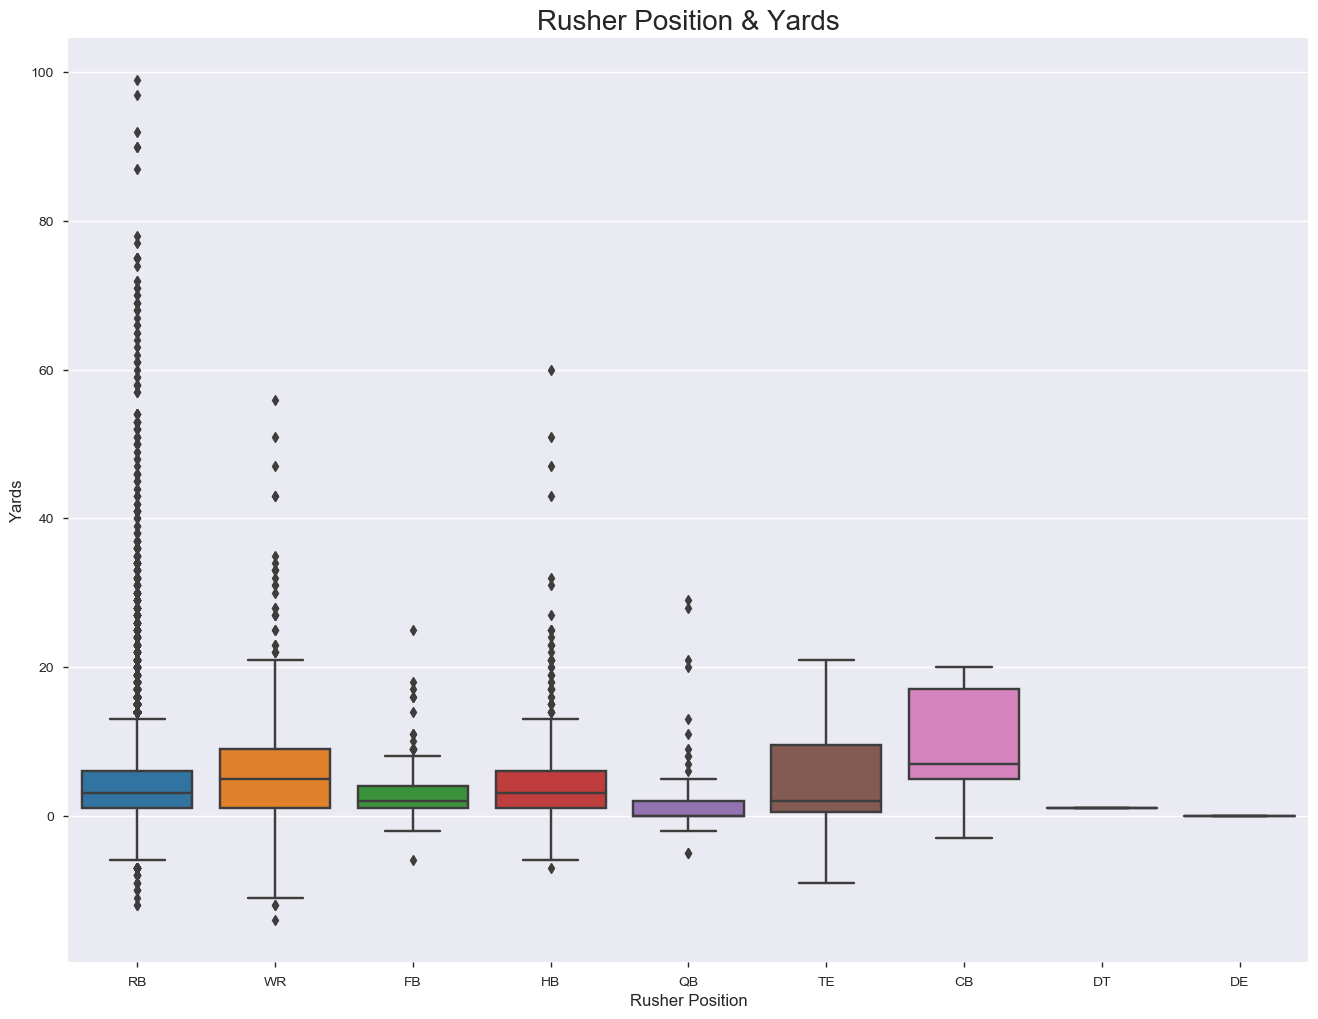

In [32]:
plt.figure(figsize=(16,12))
temp_df = train_df.query("NflIdRusher == NflId")
sns.boxplot(data=temp_df, x="Position", y="Yards", showfliers=True)
plt.xlabel('Rusher Position', fontsize=12)
plt.ylabel('Yards', fontsize=12)
plt.title("Rusher Position & Yards", fontsize=20)
plt.show()

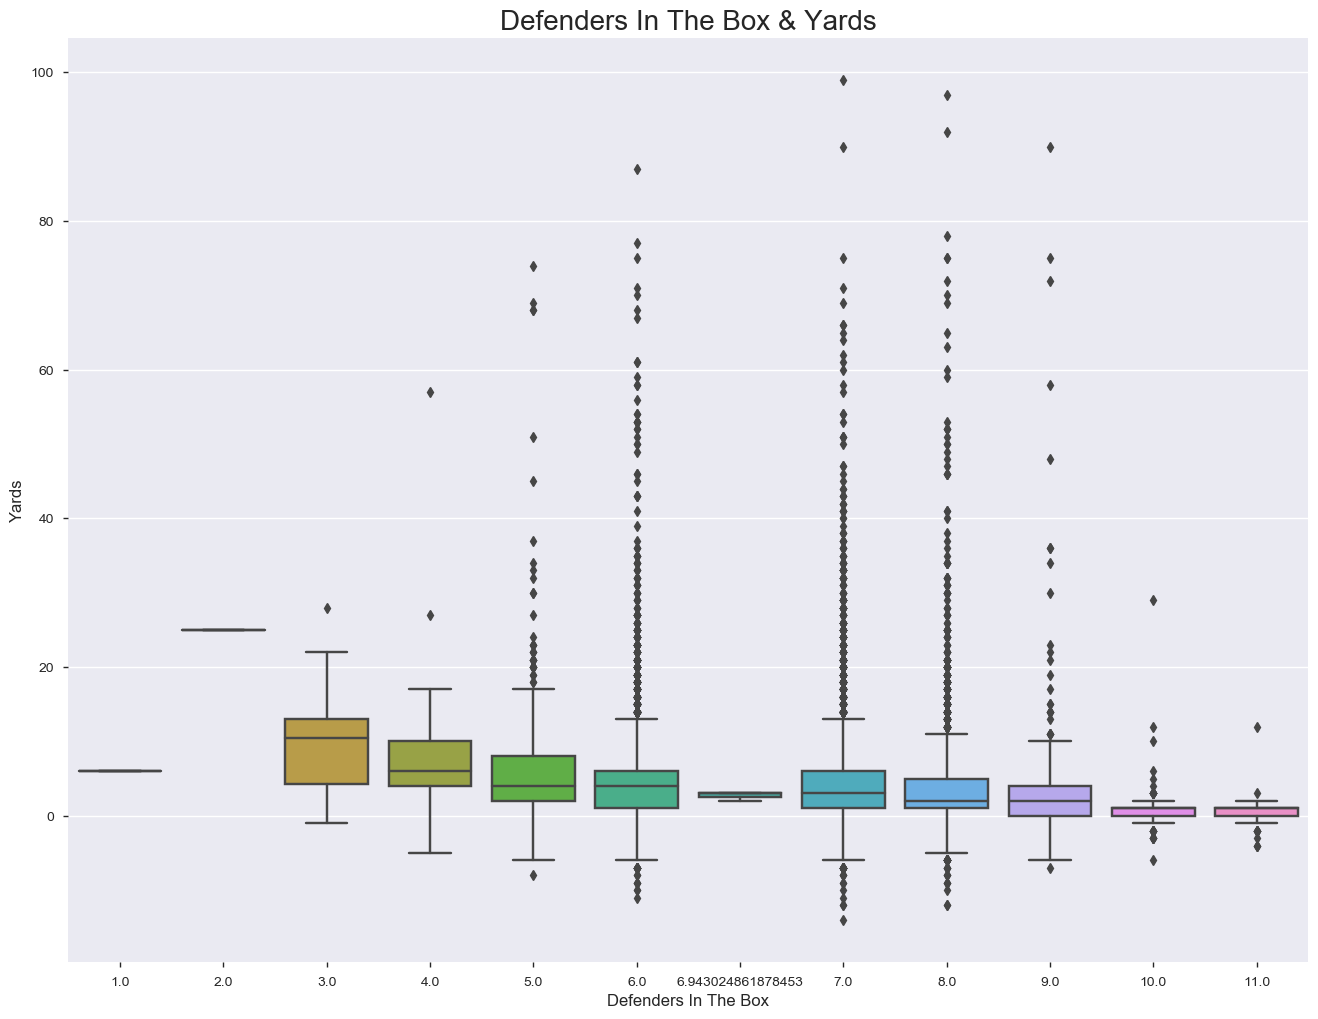

In [33]:
plt.figure(figsize=(16,12))
temp_df = train_df.query("NflIdRusher == NflId")
sns.boxplot(data=temp_df, x="DefendersInTheBox", y="Yards", showfliers=True)
plt.xlabel('Defenders In The Box', fontsize=12)
plt.ylabel('Yards', fontsize=12)
plt.title("Defenders In The Box & Yards", fontsize=20)
plt.show()

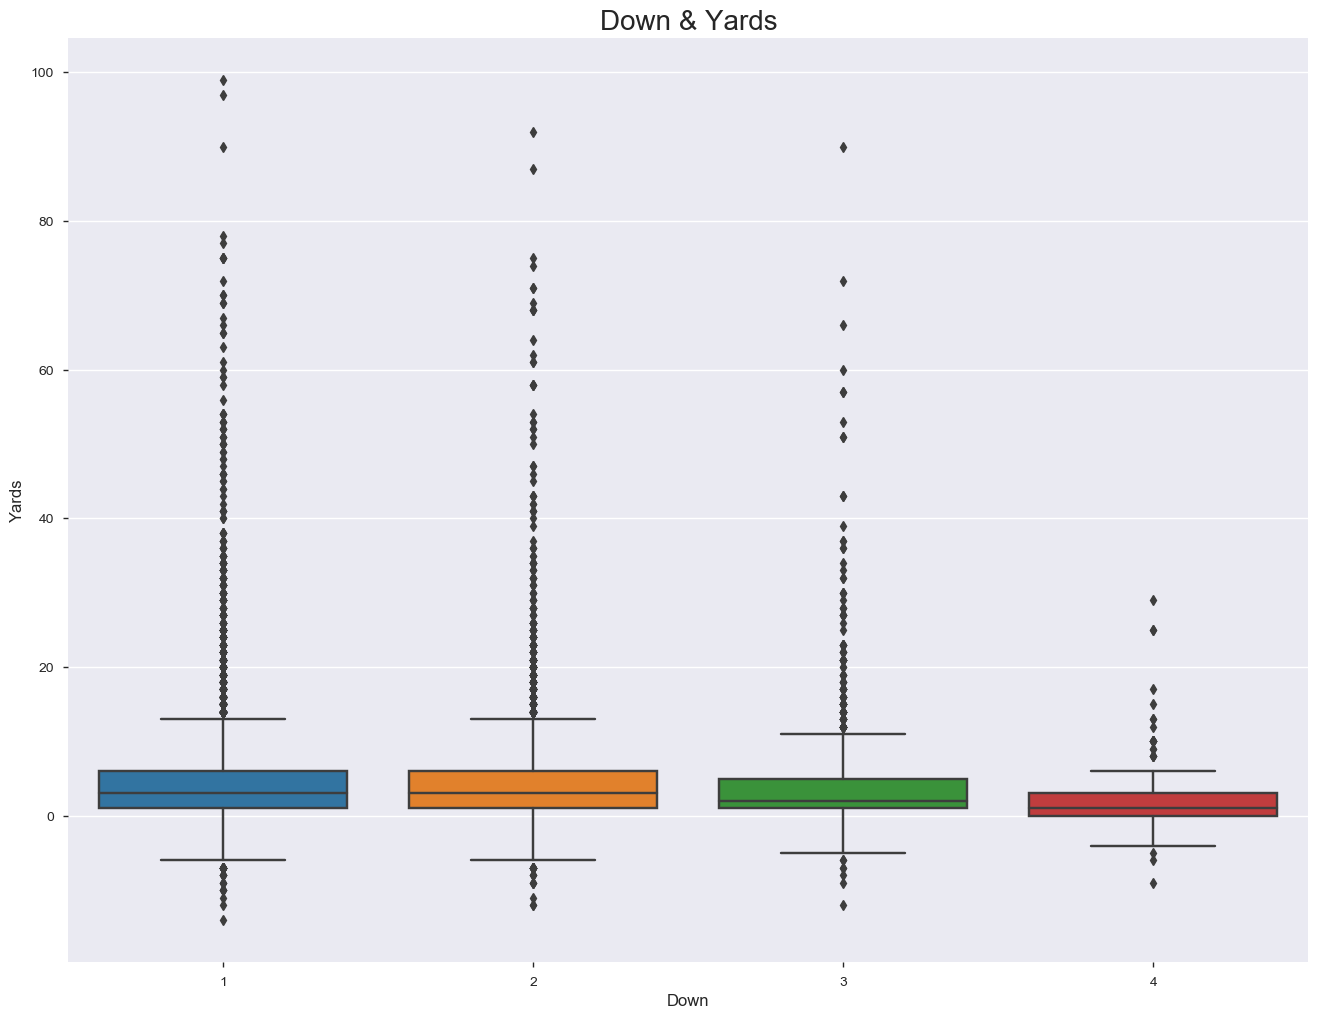

In [34]:
plt.figure(figsize=(16,12))
temp_df = train_df.query("NflIdRusher == NflId")
sns.boxplot(data=temp_df, x="Down", y="Yards", showfliers=True)
plt.xlabel('Down', fontsize=12)
plt.ylabel('Yards', fontsize=12)
plt.title("Down & Yards", fontsize=20)
plt.show()

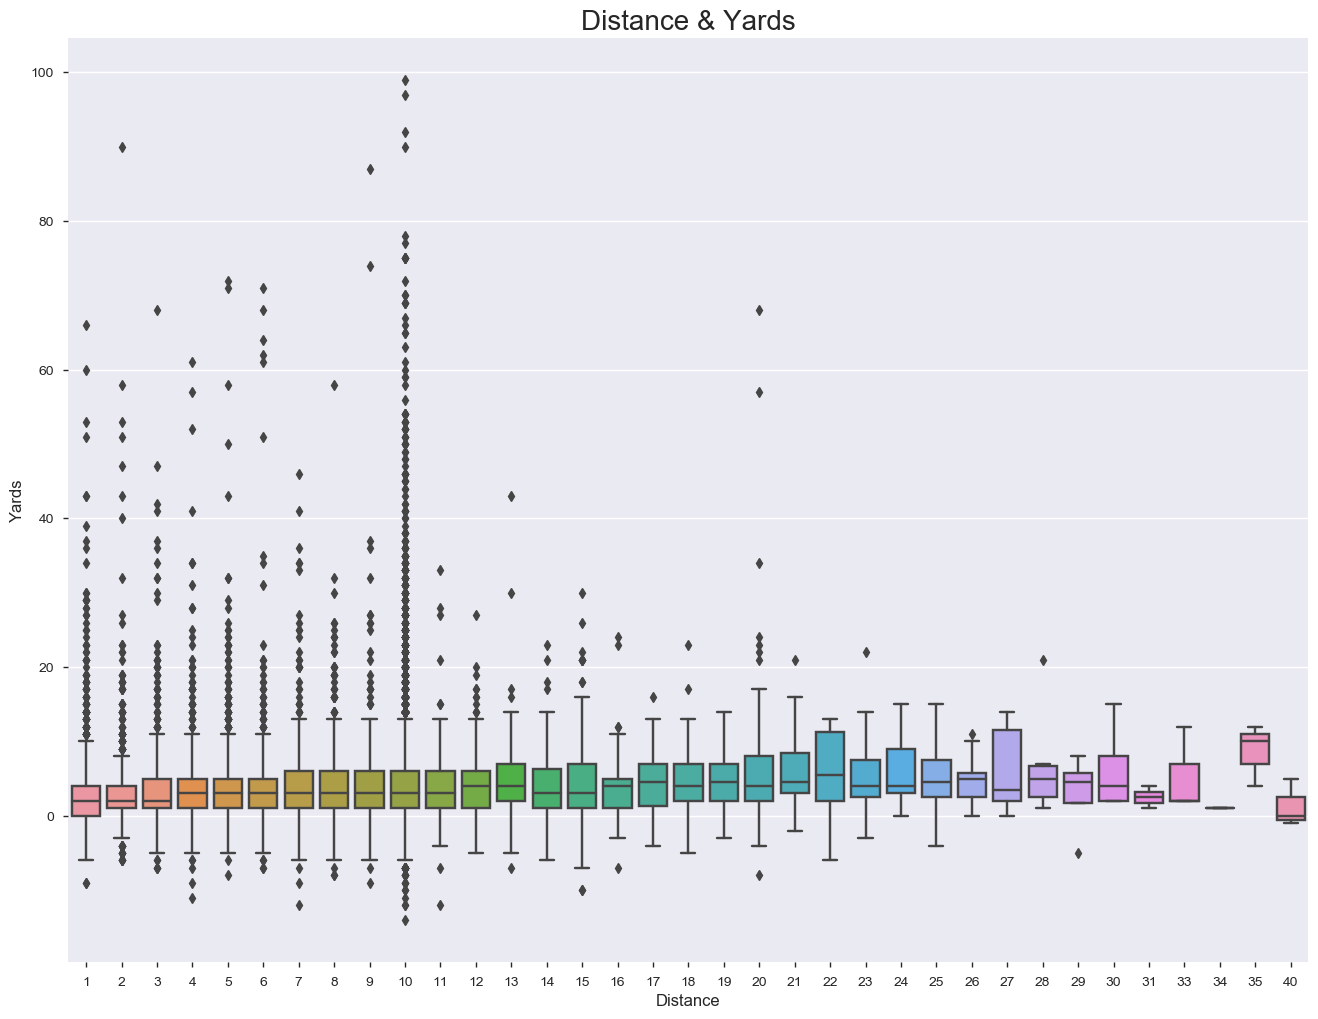

In [35]:
plt.figure(figsize=(16,12))
temp_df = train_df.query("NflIdRusher == NflId")
sns.boxplot(data=temp_df, x="Distance", y="Yards", showfliers=True)
plt.xlabel('Distance', fontsize=12)
plt.ylabel('Yards', fontsize=12)
plt.title("Distance & Yards", fontsize=20)
plt.show()